<a href="https://colab.research.google.com/github/SidrahAaishah/Ml-practice/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# svm will be used
# best would have been gradient boosting model like lightgbm etc

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [13]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [14]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [17]:
loan_dataset = loan_dataset.dropna()

In [18]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-3950240672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [19]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [20]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [21]:
loan_dataset = loan_dataset.replace(to_replace='3+',value=4)

In [22]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [29]:
loan_dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


<Axes: xlabel='Education', ylabel='count'>

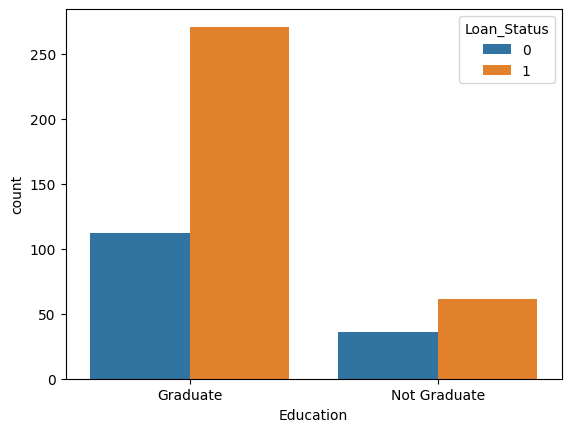

In [30]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

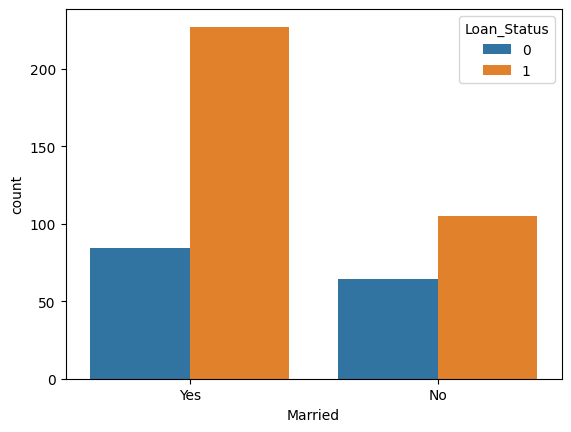

In [31]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

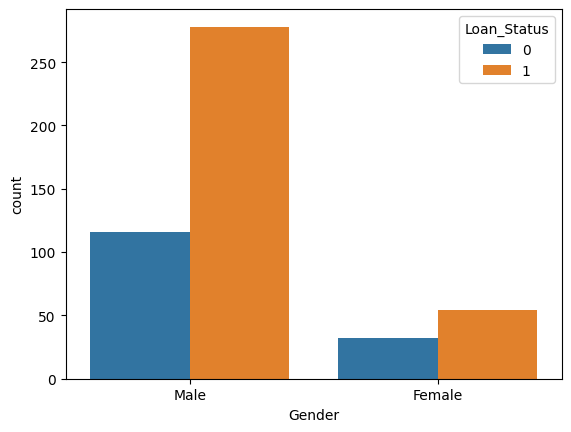

In [32]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

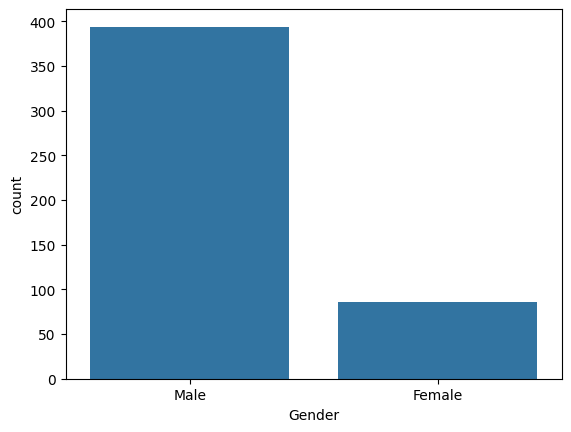

In [35]:
sns.countplot(x='Gender',data=loan_dataset)

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [39]:
loan_dataset['Credit_History'].value_counts()
loan_dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,191
Urban,150
Rural,139


In [50]:
loan_dataset.replace({'Married':{'Yes':1,'No':0},'Self_Employed':{'Yes':1,'No':0},'Gender':{'Female':1,'Male':0},'Property_Area':{'Rural':1,'Semiurban':2,'Urban':0},'Education':{'Graduate':1,'Not Graduate':0} },inplace=True)

/tmp/ipython-input-2048987475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'Yes':1,'No':0},'Self_Employed':{'Yes':1,'No':0},'Gender':{'Female':1,'Male':0},'Property_Area':{'Rural':1,'Semiurban':2,'Urban':0},'Education':{'Graduate':1,'Not Graduate':0} },inplace=True)


In [51]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


In [59]:
X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [61]:
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state = 2)

In [63]:
model = svm.SVC(kernel='linear')

In [64]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [68]:
model_prediction = model.predict(X_train)

In [70]:
score = accuracy_score(model_prediction,y_train)
print(score)

0.8032407407407407


In [71]:
model_prediction2 = model.predict(X_test)
score2 = accuracy_score(model_prediction2,y_test)
print(score2)

0.8125
